# Trabalho 2 IA

## Membros

- Leonardo Gueno Rissetto (13676482) - Presente em aula
- Lucas Lima Romero (13676325) - Presente em aula
- Luciano Gonçalves Lopes Filho (13676520) - Presente em aula
- Marco Antonio Gaspar Garcia (11833581) - Presente em aula
- Thiago Kashivagui Gonçalves (13676579) - Presente em aula

## Escolha dos Dados

Heurística para escolha dos dados:
1.  Cada um procurou um tema que fosse de interesse de forma individual 
2.  Cada um apresentou um dataset que julgou ser interessante 
3.  Entrou-se em consenso quanto a escolha do tema
4.  Procuramos um dataset de melhor qualidade e com mais dados sobre o assunto escolhido

## Link Kaggle

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Preparação de Dados para Modelo Preditivo de Diabetes
Este notebook realiza a preparação dos dados do dataset `diabetes_prediction_dataset.csv` para aplicação em modelos preditivos de diabetes.

Divisão de tarefas para preparação dos dados:
- Luciano ficou responsável pela parte inicial de caracterização dos dados
- Marco e Lucas ficaram responsáveis pela parte de exploração dos dados, fase que visa entender melhor as características e padrões dos dados
- Leonardo e Thiago ficaram responsáveis pela parte de pré-processamento dos dados


## 1. Importação das Bibliotecas
Importação das bibliotecas necessárias para análise e preparação dos dados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## 2. Carregamento e Visualização Inicial dos Dados
Carregamento do dataset e visualização das primeiras linhas.

In [3]:
# Carregar o dataset
df = pd.read_csv('../Dataset/diabetes_prediction_dataset.csv')
# Visualizar as primeiras linhas
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 3. Informações Gerais e Tratamento de Valores
Verificação de tipos de dados, valores ausentes e tratamento caso necessário.

In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Verificar valores ausentes
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# Preencher valores ausentes com a mediana (numéricos) ou moda (categóricos)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [7]:
# Remover linhas duplicadas
df = df.drop_duplicates()
# Remover linhas onde o gênero é 'Other' já que é uma parte muito pequena da amostra
if 'gender' in df.columns:
    df = df[df['gender'] != 'Other']
# Conferir resultado
df['gender'].value_counts() if 'gender' in df.columns else None

gender
Female    56161
Male      39967
Name: count, dtype: int64

## 4. Análise Exploratória dos Dados
Visualização de estatísticas descritivas e gráficos para entender a distribuição das variáveis.

In [8]:
# Estatísticas descritivas
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128,96128.000000,96128.000000,96128.000000,96128,96128.000000,96128.000000,96128.000000,96128.000000
unique,2,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34395,NaN,NaN,NaN,NaN
mean,NaN,41.796617,0.077615,0.040810,NaN,27.321450,5.532633,138.218001,0.088237
std,NaN,22.463329,0.267567,0.197851,NaN,6.767811,1.073225,40.911190,0.283640
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


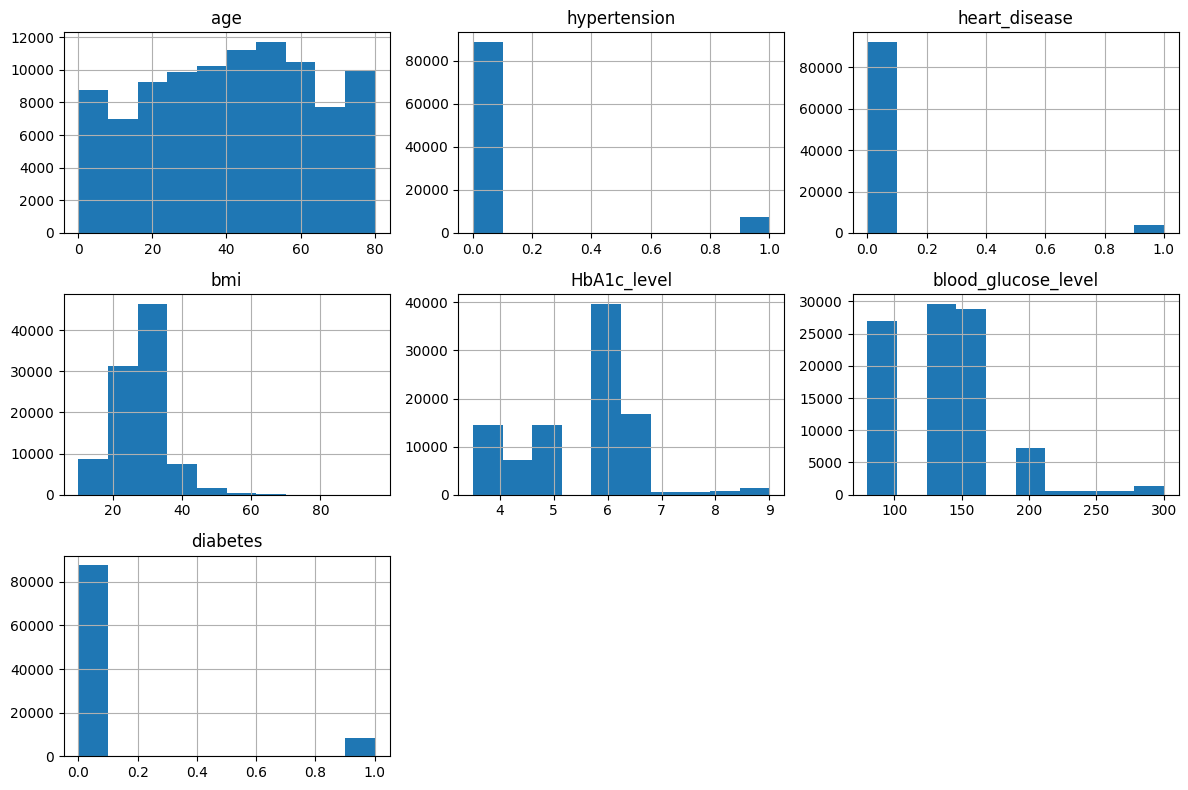

In [9]:
# Visualização de distribuições das variáveis numéricas
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

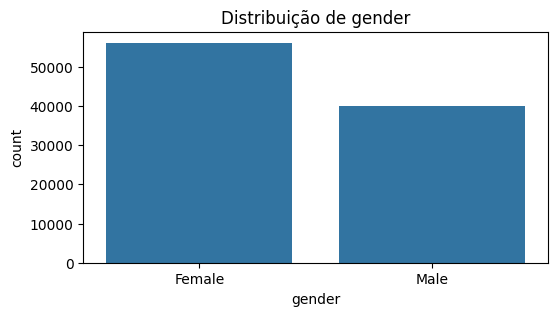

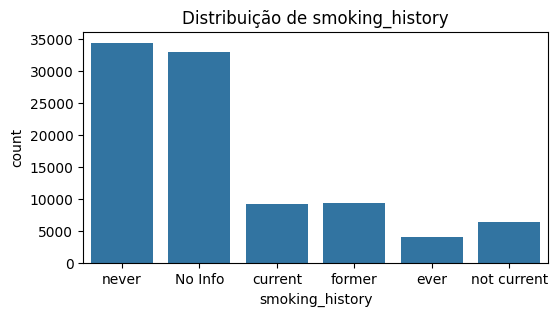

In [10]:
# Visualização de variáveis categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribuição de {col}')
    plt.show()

## 5. Codificação de Variáveis Categóricas
Transformação de variáveis categóricas em numéricas para uso em modelos.

In [11]:
# Codificação de variáveis categóricas
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

## 6. Normalização/Padronização dos Dados
Aplicação de normalização ou padronização nas variáveis numéricas.

In [12]:
# Selecionar colunas numéricas
num_cols = df.select_dtypes(include=np.number).columns
# Padronização (z-score)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## 7. Dataset Pronto para Modelagem
Exibição do dataset final, pronto para ser utilizado em modelos preditivos.

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.843594,1.700709,-0.290080,4.848061,0.941024,-0.314941,0.994547,0.043558,-0.311088
1,-0.843594,0.543261,-0.290080,-0.206268,-1.186804,-0.000214,0.994547,-1.423041,-0.311088
2,1.185405,-0.614187,-0.290080,-0.206268,0.941024,-0.000214,0.155949,0.483538,-0.311088
3,-0.843594,-0.258049,-0.290080,-0.206268,-0.654847,-0.572042,-0.496294,0.410208,-0.311088
4,1.185405,1.522640,3.447327,4.848061,-0.654847,-1.061124,-0.682649,0.410208,-0.311088
